In [43]:
import pandas as pd

In [44]:
df = pd.read_csv('superstore.csv', encoding='latin1')

In [45]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [46]:
receita_total= df['Sales'].sum()
print(f"Receita Total: ${receita_total:,.2f}")

receita_por_categoria = df.groupby('Category') ['Sales'].sum()
print("\n Receita por Categoria")
print(receita_por_categoria)

receita_por_regiao = df.groupby('Region')['Sales'].sum()
print("\n Receita po Região:")
print(receita_por_regiao)

Ticket_medio = df['Sales'].mean()
print(f"\n Ticket Médio: ${Ticket_medio:,.2f}")

Receita Total: $2,297,200.86

 Receita por Categoria
Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

 Receita po Região:
Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

 Ticket Médio: $229.86


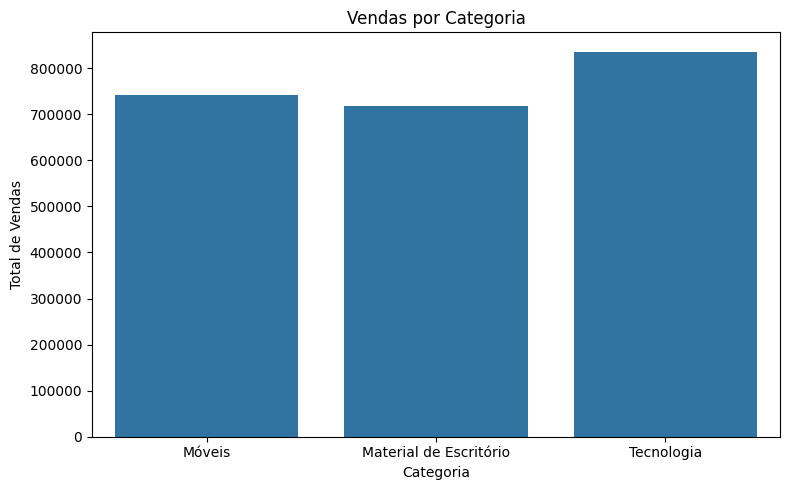

In [56]:
# Gráfico de barras: Vendas por categoria

from matplotlib import pyplot as plt


traducao_categoria = {
    "Furniture": "Móveis",
    "Office Supplies": "Material de Escritório",
    "Technology": "Tecnologia"
}

# Criar uma cópia com as categorias traduzidas
df['Category_pt'] = df['Category'].replace(traducao_categoria)

# Gráfico de barras: Vendas por categoria (em português)
plt.figure(figsize=(8,5))
sns.barplot(x='Category_pt', y='Sales', data=df, estimator=sum, errorbar=None)
plt.title('Vendas por Categoria')
plt.ylabel('Total de Vendas')
plt.xlabel('Categoria')
plt.tight_layout()
plt.show()


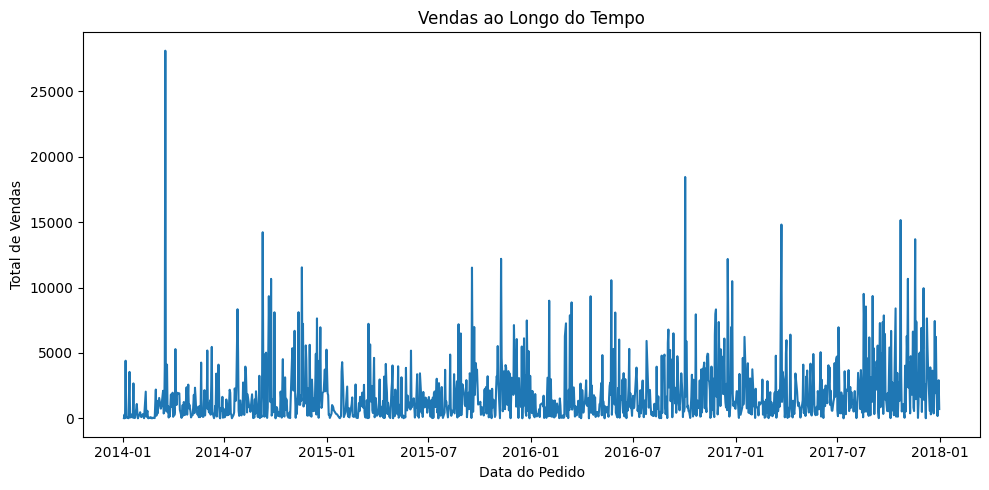

In [ ]:
# Gráfico de linhas: Vendas ao longo do tempo

from matplotlib import pyplot as plt


df ['Order Date'] = pd.to_datetime(df['Order Date'])

#Agrupar vendas por data
vendas_por_data= df.groupby('Order Date')['Sales'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='Order Date', y='Sales', data=vendas_por_data)
plt.title('Vendas ao Longo do Tempo')
plt.ylabel('Total de Vendas')
plt.xlabel('Data do Pedido') 
plt.tight_layout()
plt.show()

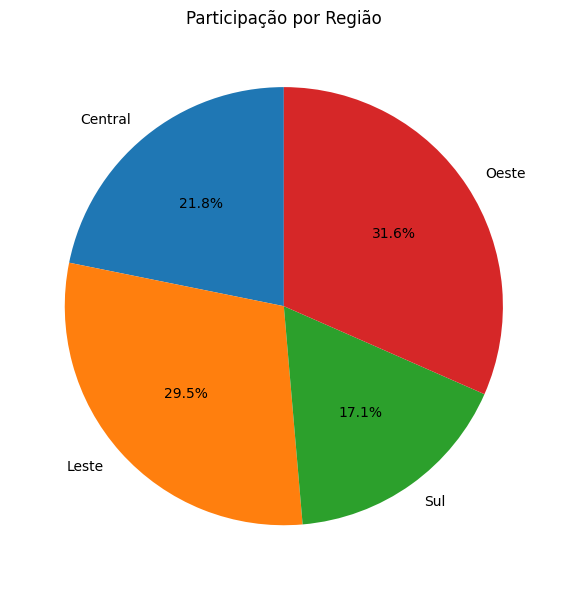

In [54]:
# Gráfico de pizza: Participação por região
traducao = {
    "Central": "Central",
    "East": "Leste",
    "South": "Sul",
    "West": "Oeste"
}

# Agrupar vendas e renomear regiões
vendas_por_data = df.groupby('Region')['Sales'].sum()
vendas_por_data = vendas_por_data.rename(index=traducao)

# Gráfico de pizza
plt.figure(figsize=(6,6))
vendas_por_data.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Participação por Região')
plt.ylabel('')  # remove rótulo do eixo Y
plt.tight_layout()
plt.show()


In [ ]:
# Conslusão

- A categoria Tecnologia teve a maior receita total, seguida de Móveis.

- A região Oeste foi a mais lucrativa, com maior participação nas vendas.

- As vendas mostram uma tendência de crescimento ao longo do tempo, com picos em meses específicos.